This is the code to classify(binary) images as cat or dogs using logistic neural classifier.

Importing some required packages.

In [1]:
import torch
import h5py
import cv2
from matplotlib import pyplot as plt

import pathlib
import os

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Will use {}'.format(device))

Will use cuda


Reading images and converting to RGB channels, also resizing to 64x64 size.

In [3]:
train_data_hf =  h5py.File('train_catvnoncat.h5', 'r')
print(train_data_hf.keys())
train_x = torch.tensor(train_data_hf.get('train_set_x'))
train_y = torch.tensor(train_data_hf.get('train_set_y'))

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>


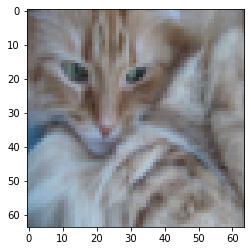

In [4]:
plt.imshow(train_x[2])

In [5]:
train_x = train_x.to(device)
train_y = train_y.to(device)

In [6]:
m,w,h,c = train_x.shape
n = w*h*c
train_x = train_x.reshape(m,n).T
train_y = train_y.reshape(1,m)
train_x.shape, train_y.shape

(torch.Size([12288, 209]), torch.Size([1, 209]))

In [7]:
train_x = train_x/255

Here i the model which will be used.

In [8]:
learning_rate = 0.00005

In [9]:
class Model:
    def __init__(self,features,learning_rate,device):
        torch.manual_seed(7)
        self.w1 = torch.rand((7,features),requires_grad=True,device=device)
        self.b1 = torch.zeros((7,1),requires_grad=True,device=device)
        self.w2 = torch.rand((1,7),requires_grad=True,device=device)
        self.b2 = torch.zeros((1,1),requires_grad=True,device=device)
        self.learning_rate = learning_rate
    
    def forward_pass(self,X):
        self.Z1 = torch.matmul(self.w1,X.float()) + self.b1
        self.A1 = self.sigmoidActivation(self.Z1)
        
        self.Z2 = torch.matmul(self.w2,self.A1) + self.b2
        self.A2 = self.sigmoidActivation(self.Z2)
        return self.A2
    
    def compute_cost(self,Y):
        return -1/Y.shape[1]*( torch.matmul(Y.float(),torch.log(self.A2).T) + torch.matmul(1-Y.float(),torch.log(1-self.A2).T))
    
    def back_pass(self):      
        with torch.no_grad():
            self.w2 = self.w2 - self.learning_rate*self.w2.grad
            self.b2 = self.b2 - self.learning_rate*self.b2.grad
            self.w1 = self.w1 - self.learning_rate*self.w1.grad
            self.b1 = self.b1 - self.learning_rate*self.b1.grad
            
        
        self.w1.requires_grad=True
        self.b1.requires_grad=True
        self.w2.requires_grad=True
        self.b2.requires_grad=True
        
        #self.w1.grad.data.zero_()
        #self.b1.grad.zero_()
        #self.w2.grad.zero_()
        #self.b2.grad.zero_()
        
    def predict(self, X):
        return self.forward_pass(X)>0.5
    
    def sigmoidActivation(self,Z):
        return 1/(1+torch.exp(-Z))
    
    def reluActivation(self,Z):
        return torch.maximum(torch.Tensor([0]).to(torch.device('cuda' if torch.cuda.is_available() else 'cpu')),Z)
    
    def getParams(self):
        return {'w1':self.w1, 'b1':self.b1,'w2':self.w2, 'b2':self.b2,
                'w3':self.w3, 'b3':self.b3,'w4':self.w4, 'b4':self.b4,
                'learning_rate':self.learning_rate
               }
    
    
    def getGrads(self):
        return {'dw1':self.w1.grad, 'db1':self.b1.grad,'dw2':self.w2.grad, 'db2':self.b2.grad,
               'dw3':self.w3.grad, 'db3':self.b3.grad,'dw4':self.w4.grad, 'db4':self.b4.grad
               }

In [10]:
classifier = Model(n,learning_rate,device)
costs=[]

In [14]:
for i in range(10000):
    Y_hat = classifier.forward_pass(train_x)
    cost = classifier.compute_cost(train_y)
    costs.append(cost)
    cost.backward()
    classifier.back_pass()
plt.plot(costs)

RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 4.00 GiB total capacity; 2.76 GiB already allocated; 0 bytes free; 2.80 GiB reserved in total by PyTorch)

In [12]:
classifier.forward_pass(train_x).int()

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0',
       dtype=torch.int32)

In [13]:
class Model2:
    def __init__(self,features,learning_rate,device):
        self.w1 = torch.rand((20,features),requires_grad=True,device=device)
        self.b1 = torch.zeros((20,1),requires_grad=True,device=device)
        self.w2 = torch.rand((7,20),requires_grad=True,device=device)
        self.b2 = torch.zeros((7,1),requires_grad=True,device=device)
        self.w3 = torch.rand((5,7),requires_grad=True,device=device)
        self.b3 = torch.zeros((5,1),requires_grad=True,device=device)
        self.w4 = torch.rand((1,5),requires_grad=True,device=device)
        self.b4 = torch.zeros((1,1),requires_grad=True,device=device)
        self.learning_rate = learning_rate
    
    def forward_pass(self,X):
        self.Z1 = torch.matmul(self.w1,X.float()) + self.b1
        self.A1 = self.sigmoidActivation(self.Z1)
        
        self.Z2 = torch.matmul(self.w2,self.A1) + self.b2
        self.A2 = self.sigmoidActivation(self.Z2)
        
        self.Z3 = torch.matmul(self.w3,self.A2) + self.b3
        self.A3 = self.sigmoidActivation(self.Z3)
        
        self.Z4 = torch.matmul(self.w4,self.A3) + self.b4
        self.A4 = self.sigmoidActivation(self.Z4)
        return self.A4
    
    def compute_cost(self,Y):
        return -1/Y.shape[1]*( torch.matmul(Y.float(),torch.log(self.A4).T) + torch.matmul(1-Y.float(),torch.log(1-self.A4).T))
    
    def back_pass(self):      
        with torch.no_grad():
            self.w4 = self.w4 - self.learning_rate*self.w4.grad
            self.b4 = self.b4 - self.learning_rate*self.b4.grad
            self.w3 = self.w3 - self.learning_rate*self.w3.grad
            self.b3 = self.b3 - self.learning_rate*self.b3.grad
            self.w2 = self.w2 - self.learning_rate*self.w2.grad
            self.b2 = self.b2 - self.learning_rate*self.b2.grad
            self.w1 = self.w1 - self.learning_rate*self.w1.grad
            self.b1 = self.b1 - self.learning_rate*self.b1.grad
            
        
        self.w1.requires_grad=True
        self.b1.requires_grad=True
        self.w2.requires_grad=True
        self.b2.requires_grad=True
        self.w3.requires_grad=True
        self.b3.requires_grad=True
        self.w4.requires_grad=True
        self.b4.requires_grad=True
        
        #self.w1.grad.data.zero_()
        #self.b1.grad.zero_()
        #self.w2.grad.zero_()
        #self.b2.grad.zero_()
        
    def predict(self, X):
        return self.forward_pass(X)>0.5
    
    def sigmoidActivation(self,Z):
        return 1/(1+torch.exp(-Z))
    
    def leakyReLUActivation(self,Z):
        return torch.maximum(0.001*Z,Z)
    
    def getParams(self):
        return {'w1':self.w1, 'b1':self.b1,'w2':self.w2, 'b2':self.b2,
                'w3':self.w3, 'b3':self.b3,'w4':self.w4, 'b4':self.b4,
                'learning_rate':self.learning_rate
               }
    
    
    def getGrads(self):
        return {'dw1':self.w1.grad, 'db1':self.b1.grad,'dw2':self.w2.grad, 'db2':self.b2.grad,
               'dw3':self.w3.grad, 'db3':self.b3.grad,'dw4':self.w4.grad, 'db4':self.b4.grad
               }